#  Introduction aux classifieurs linéaires paramétriques


## Données jouets et visualisation

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


/home/ambroise012/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [12]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, cluster_std=2, random_state=42)

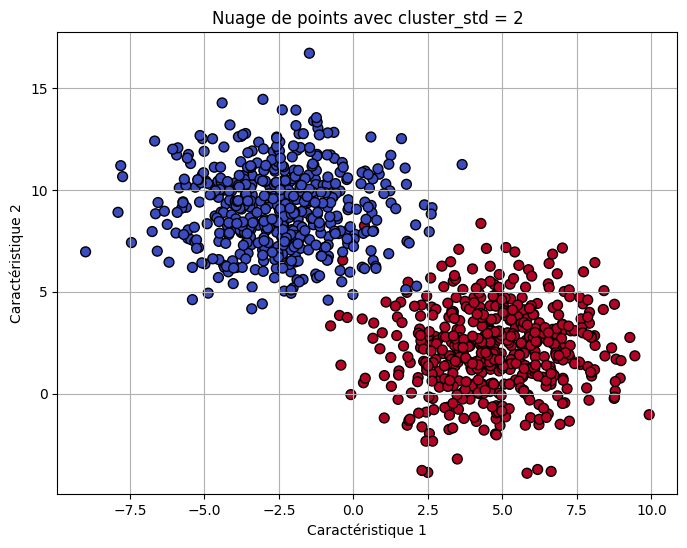

In [15]:
y = np.where(y == 0, -1, y)

# Séparation des données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualisation du nuage de points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=50)
plt.title(f"Nuage de points avec cluster_std = 2")
plt.xlabel("Caractéristique 1")
plt.ylabel("Caractéristique 2")
plt.grid(True)
plt.show()

Pour différente valeur de cluster_std :


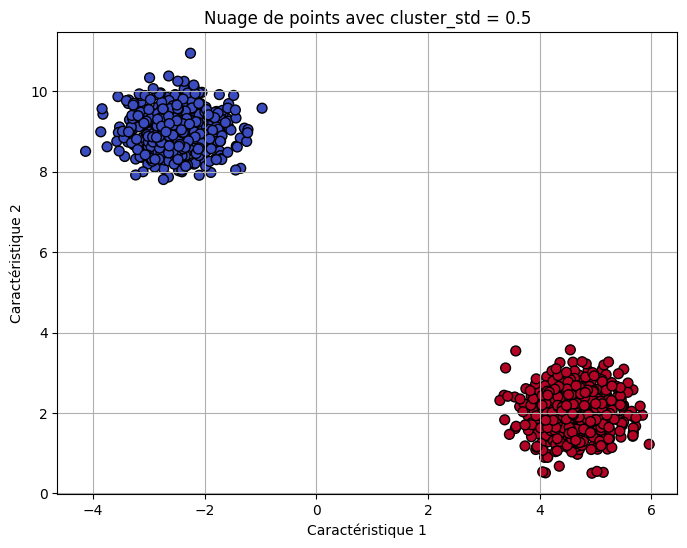

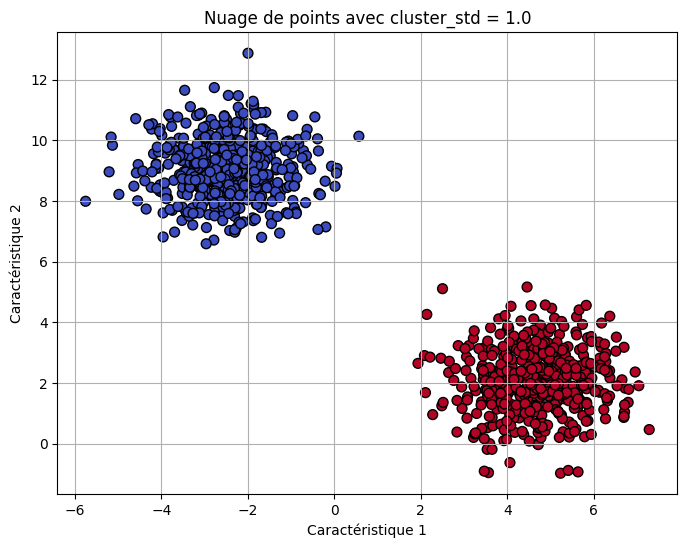

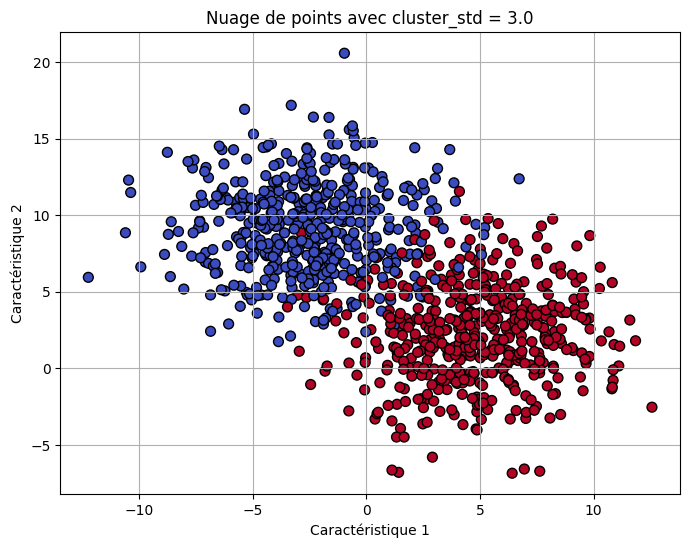

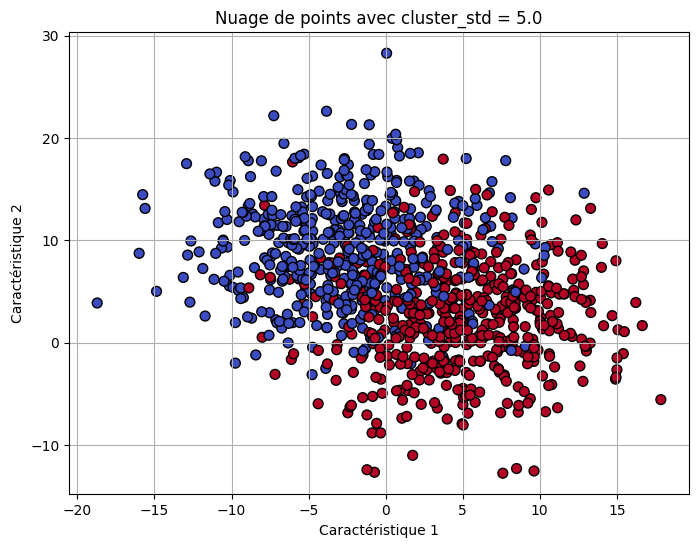

In [19]:
for std in [0.5, 1.0, 3.0, 5.0]:
    X, y = make_blobs(n_samples=1000, centers=2, n_features=2, cluster_std=std, random_state=42)
    y = np.where(y == 0, -1, y)

    # Séparation des données en train et test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Visualisation du nuage de points
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=50)
    plt.title(f"Nuage de points avec cluster_std = {std}")
    plt.xlabel("Caractéristique 1")
    plt.ylabel("Caractéristique 2")
    plt.grid(True)
    plt.show()


## Perceptron

Poids =  [ 3.49327371 -2.9237151 ]
Biais =  10.499999999999996
Erreur :  [69, 48, 56, 50, 58, 59, 51, 53, 52, 60, 56, 62, 52, 52, 56, 58, 62, 55, 52, 58, 56, 52, 58, 52, 59, 59, 59, 51, 50, 50, 57, 53, 61, 53, 53, 58, 59, 54, 53, 53, 59, 59, 51, 55, 58, 58, 55, 50, 58, 53, 56, 56, 58, 58, 57, 57, 53, 57, 59, 54, 59, 58, 58, 59, 54, 59, 54, 58, 58, 59, 55, 51, 50, 50, 60, 58, 59, 54, 51, 58, 53, 56, 52, 53, 58, 59, 56, 55, 59, 58, 58, 59, 53, 60, 58, 62, 45, 55, 58, 59, 51, 56, 50, 49, 58, 58, 58, 56, 55, 58, 61, 59, 55, 59, 58, 59, 55, 57, 44, 52, 59, 53, 53, 58, 59, 54, 58, 56, 54, 58, 58, 56, 60, 55, 52, 48, 53, 59, 56, 55, 59, 58, 58, 59, 58, 53, 58, 58, 58, 53, 50, 50, 59, 58, 61, 57, 62, 45, 52, 58, 59, 56, 51, 55, 59, 58, 57, 59, 58, 57, 58, 61, 51, 56, 50, 49, 58, 58, 58, 56, 55, 58, 61, 59, 55, 59, 58, 59, 55, 53, 56, 58, 59, 53, 50, 49, 53, 57, 58, 59]


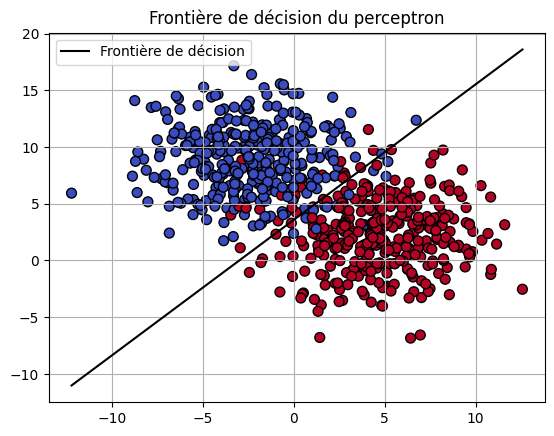

In [76]:
def perceptron_train(X, y, lr, n_epochs):
    n_samples, d = X.shape
    w = np.zeros(d)
    b = 0
    error_tot = []
    for epoch in range(n_epochs):
        error = 0
        for i in range(n_samples):
            xi, yi = X[i], y[i]
            y_hat_i =  np.sign(np.dot(w, xi) + b)
            if yi != y_hat_i:
                w += lr * (yi - y_hat_i)*xi
                b += lr * (yi - y_hat_i)
                error += 1
        error_tot.append(error)
    return w,b, error_tot

def perceptron_predict(X, w, b):
    np.sign(np.dot(X, w) + b)

lr = 0.1
n_epochs = 200

X, y = make_blobs(n_samples=1000, centers=2, n_features=2, cluster_std=3.0, random_state=42)
y = np.where(y == 0, -1, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# X = (X - X.mean(axis=0)) / X.std(axis=0)

w,b, error_tot = perceptron_train(X_train,y_train,lr,n_epochs)
print("Poids = ", w)
print("Biais = ", b)

print("Erreur : ", error_tot)

# frontiere de decision 
x1_min, x1_max = X_train[:, 0].min(), X_train[:, 0].max()
x1 = np.linspace(x1_min, x1_max, 100)

w1, w2 = w
x2 = -(w1 * x1 + b) / w2   # correction mineure : +b, pas -b

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
            cmap='coolwarm', edgecolor='k', s=50)
plt.plot(x1, x2, 'k-', label='Frontière de décision')
plt.title("Frontière de décision du perceptron")
plt.legend()
plt.grid(True)
plt.show()



## Régression logistique

In [63]:
from sklearn.linear_model import LogisticRegression

X, y = make_blobs(n_samples=1000, centers=2, n_features=2, cluster_std=3.0, random_state=42)
y = np.where(y == 0, -1, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:, 1]
print("Poids (w) :", lr.coef_[0])
print("Biais (b) :", lr.intercept_[0])

Poids (w) : [ 0.71362107 -0.67739397]
Biais (b) : 2.896146078610751


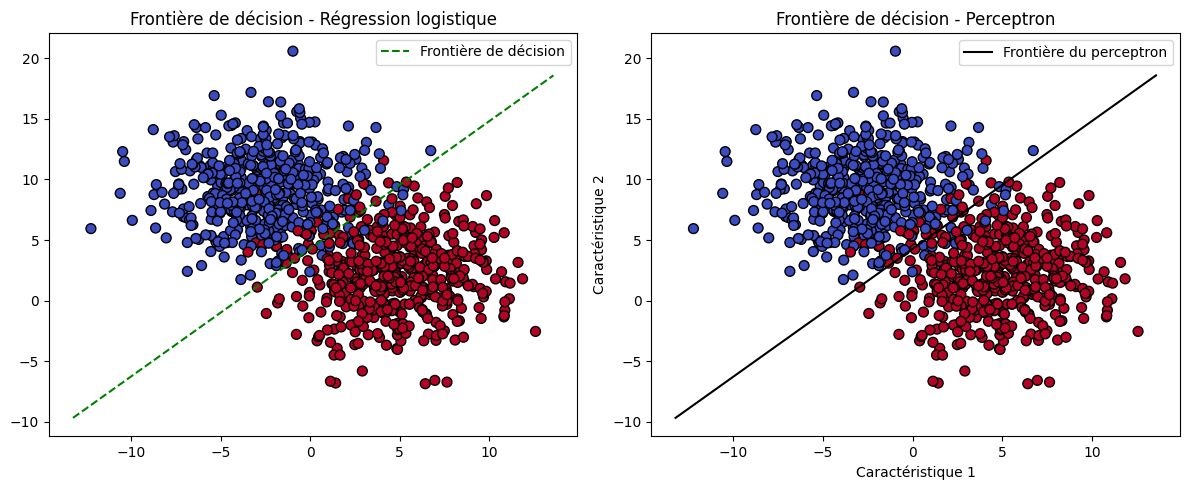

In [ ]:
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
w1, w2 = lr.coef_[0]
b = lr.intercept_[0]

x1 = np.linspace(x1_min, x1_max, 100)
x2 = -(w1 * x1 + b) / w2

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=50)
plt.plot(x1, x2, 'g--', label='Frontière de décision')
plt.title("Frontière de décision - Régression logistique")
plt.legend()

X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
w_p,b_p, error_tot = perceptron_train(X_train,y_train,0.1,100)

w1_p, w2_p = w_p
x2_p = -(w1 * x1 + b)/w2

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=50)
plt.plot(x1, x2_p, 'k-', label='Frontière du perceptron')
plt.title("Frontière de décision - Perceptron")
plt.legend()

plt.tight_layout()
plt.show()


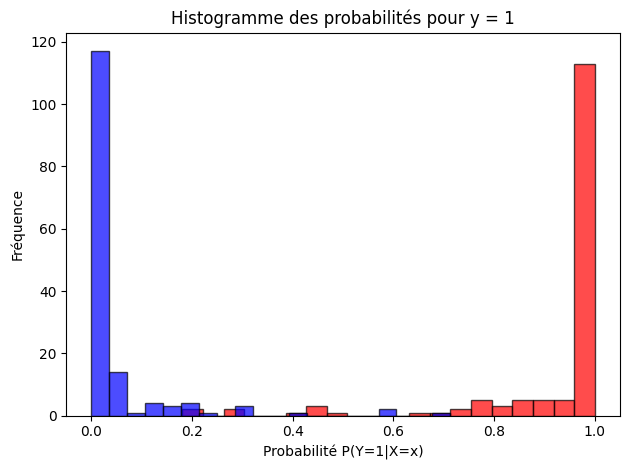

In [67]:
y_proba = lr.predict_proba(X_test)[:, 1]

proba_class_neg = y_proba[y_test == -1]
proba_class_pos = y_proba[y_test == 1]  

plt.hist(proba_class_pos, bins=20, color='red', alpha=0.7, edgecolor='black')
plt.hist(proba_class_neg, bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title("Histogramme des probabilités pour y = 1")
plt.xlabel("Probabilité P(Y=1|X=x)")
plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()

## Ajout de bruit

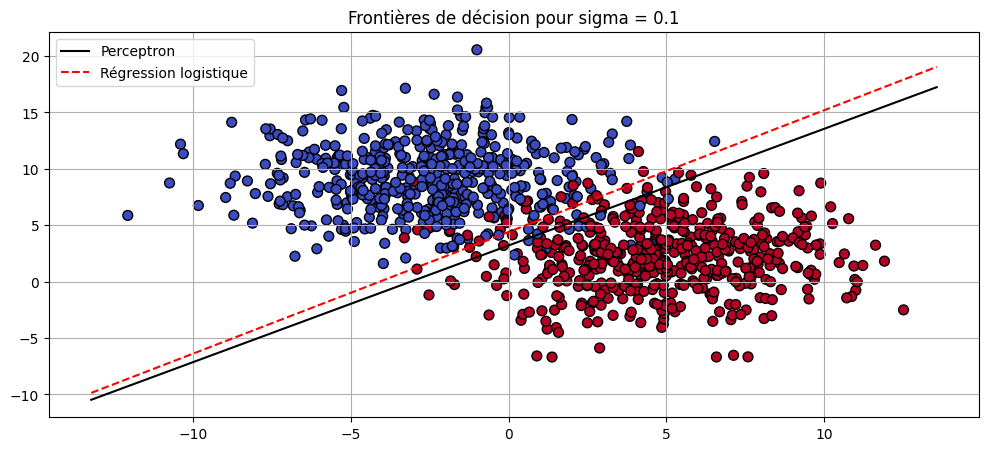

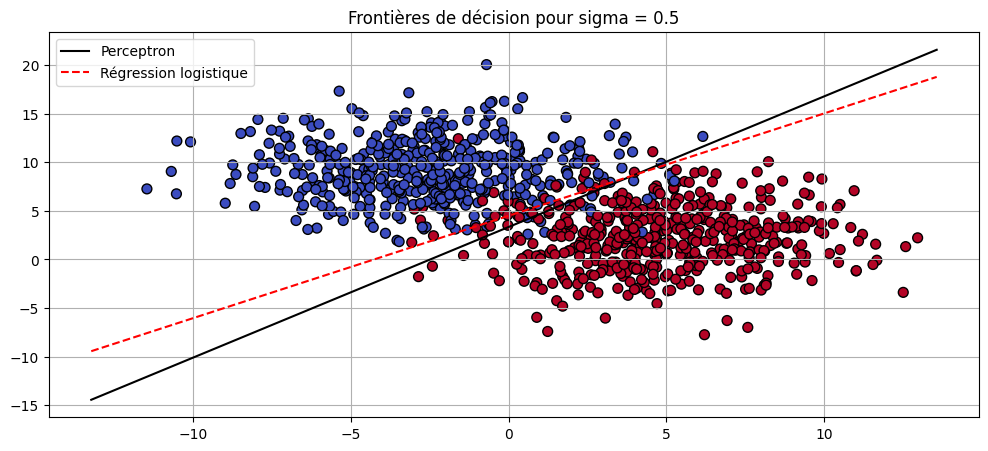

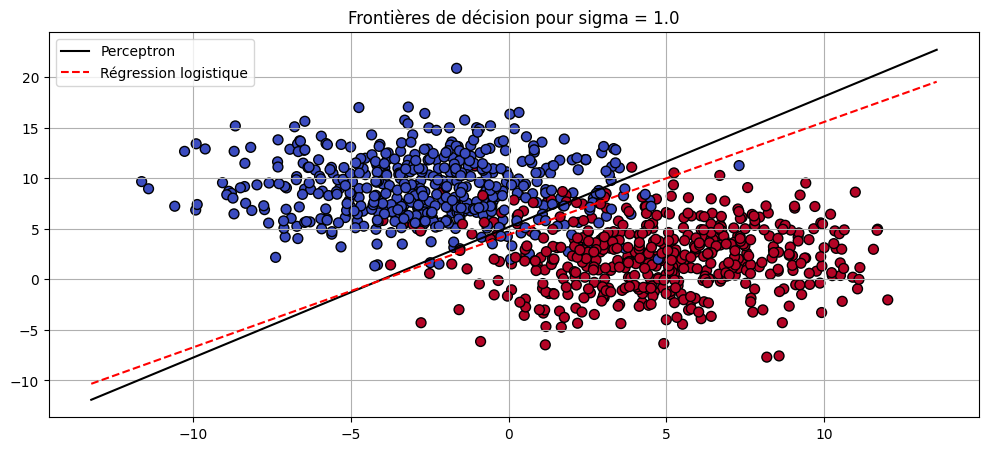

In [81]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, cluster_std=3.0, random_state=42)
y = np.where(y == 0, -1, y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr = 0.1
n_epochs = 100
# bruit gaussien
sigma = [0.1, 0.5, 1.0]
for sig in sigma:
    bruit = np.random.normal(0, sig, size=X.shape)
    X_bruit = X + bruit

    # Entraînement perceptron avec bruit sur X_train uniquement
    w_perceptron, b_perceptron, error_tot = perceptron_train(
        X_train + np.random.normal(0, sig, size=X_train.shape),
        y_train,
        0.1,
        100
    )

    # Entraînement régression logistique
    log_reg = LogisticRegression()
    log_reg.fit(X_bruit, y)
    w_logistic = log_reg.coef_[0]
    b_logistic = log_reg.intercept_[0]

    # Grille pour les frontières
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1 = np.linspace(x1_min, x1_max, 100)

    # Frontière perceptron
    x2_perceptron = -(w_perceptron[0] * x1 + b_perceptron) / w_perceptron[1]

    # Frontière logistique
    x2_logistic = -(w_logistic[0] * x1 + b_logistic) / w_logistic[1]

    # -------------------------
    # Affichage
    # -------------------------
    plt.figure(figsize=(12, 5))

    plt.scatter(X_bruit[:, 0], X_bruit[:, 1],
                c=y, cmap='coolwarm', edgecolor='k', s=50)

    plt.plot(x1, x2_perceptron, 'k-', label='Perceptron')
    plt.plot(x1, x2_logistic, 'r--', label='Régression logistique')

    plt.title(f"Frontières de décision pour sigma = {sig}")
    plt.legend()
    plt.grid(True)
    plt.show()

## Variation du seuil, courbe ROC et AUC

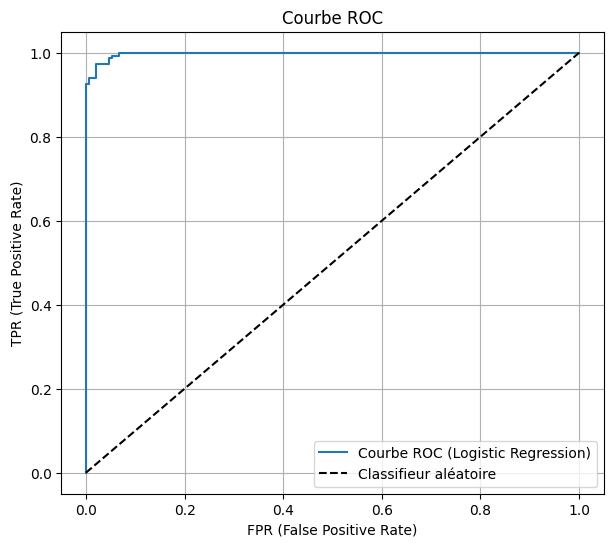

AUC = 0.9978221254277968


In [83]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# p = probabilités de prédire la classe positive (souvent y=1)
p = log_reg.predict_proba(X_test)[:, 1]

# i) Courbe ROC
FPR, TPR, seuils = roc_curve(y_test, p)

# ii) Tracé de la courbe ROC
plt.figure(figsize=(7, 6))
plt.plot(FPR, TPR, label="Courbe ROC (Logistic Regression)")

# iii) Ajouter la diagonale du classificateur aléatoire
plt.plot([0, 1], [0, 1], 'k--', label="Classifieur aléatoire")

plt.xlabel("FPR (False Positive Rate)")
plt.ylabel("TPR (True Positive Rate)")
plt.title("Courbe ROC")
plt.legend()
plt.grid(True)
plt.show()

# iv) Calcul de l'AUC
AUC = roc_auc_score(y_test, p)
print("AUC =", AUC)
